### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Friday, Feb 12th at 11.59pm CST
---

In [149]:
import numpy as np
import scipy.stats
from scipy.stats import norm
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

np.random.seed(0)

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 $$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

#### Part 1

the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$ is

$$p(x|0,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x)^2}{2\sigma^2}\right)$$

To find the half-Gaussian, we first recognize that splitting the Gaussian and keeping the 'positive half' yields:

$$p(x|0,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x)^2}{2\sigma^2}\right), x >= 0$$

$$p(x|0,\sigma) = 0, x < 0 $$

But because we chopped our original symmetric Gaussian distribution in half, this new half-Gaussian above $x=0$ only has an area of $\frac{1}{2}$. That is, we know that

$$ 0.5 = \int_{0}^{\infty} \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x)^2}{2\sigma^2}\right)$$

Because we want a normalized distribution, the area of our pdf must be $1$, not $\frac{1}{2}$. So, let's multipy both sides by $2$, and do the opposite of what we normally do, which is throw a constant *back into* an integral:

$$ 1 = 0.5 \times 2 = 2 \int_{0}^{\infty} \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x)^2}{2\sigma^2}\right) = \int_{0}^{\infty} \frac{2}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x)^2}{2\sigma^2}\right)$$

And from this, we now have a normalized half-Gaussian. It will take the form: 

$$ p(x|0, \sigma) = \frac{2}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x)^2}{2\sigma^2}\right), x >= 0 $$

#### Part 2

First, we recognize that

$$ exp\left(\frac{-(x)^2}{2\sigma^2}\right) $$

is the common link between our two equations. From our half Gaussian (note $p(x|0, \sigma) = p(x)$ for ease of notation):

$$ p(x) = \frac{2}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x)^2}{2\sigma^2}\right) \rightarrow \frac{\sigma\sqrt{2\pi}}{2}p(x) = \exp\left(\frac{-(x)^2}{2\sigma^2}\right) $$

subbing this into our intgral:

$$ \int_{0}^{\infty} x^{3} \frac{\sigma\sqrt{2\pi}}{2}p(x) dx = 2\sigma^4$$

Pulling the constants out and moving to the other side:

$$ \int_{0}^{\infty} x^{3} p(x) dx = \frac{4\sigma^{3}}{\sqrt{2\pi}} $$



In [150]:
### PART 3

#BS = set mu, sigma, and N
mu = 0
sigma = 3
N = 10**5

#BS - create a normal distribution with mu = 0 and sigma = 3
distN = scipy.stats.norm(loc = mu, scale = sigma)

#BS - take 10^5 draws from the normal distribution
draws = distN.rvs(N)

#BS - mask the samples
mask = draws > 0
draws = draws[mask]


#BS - THE NEXT CELL EXPLAINS THE MATH GOING ON HERE

# calculate the left hand side
mc_sum = (1 / N) * np.sum(draws**3)

#BS - calculate the right hand side
mc_int = 1/2 * ((4 * sigma**3) / np.sqrt(2 * np.pi))


#BS - print results
print("Monte Carlo integration gives: %0.3f" % mc_int)
print("Right hand side of the equation gives: %0.3f" % mc_sum)


#BS - check if they agree
if(np.absolute(mc_int - mc_sum) <= 0.5):
    print("MC integration agrees with the equation to within 0.5")
    
else:
    print("They don't agree. Womp womp...")


Monte Carlo integration gives: 21.543
Right hand side of the equation gives: 21.407
MC integration agrees with the equation to within 0.5


#### Part 3 (cont.)

From lecture 3, we perform Monte Carlo integration by:

$$\int_{-\infty}^{\infty} g(x) h(x)\,dx \approx \frac{1}{N}\sum_{i=1}^N g(x_i)$$

From above, we have something that resembles the left hand side of the equation here if we see that $g(x) \rightarrow x^{3}$ and so $g(x_{i}) \rightarrow x_{i}^{3}$, $h(x) \rightarrow p(x)$, and the integral here goes from $0$ to $\infty$ instead of $-\infty$ to $\infty$ (so we have to throw in a factor of $\frac{1}{2}$). So

$$\frac{1}{2} \int_{0}^{\infty} x^{3} p(x) dx \approx \frac{1}{N}\sum_{i=1}^N x_i^{3}$$

But we know this integral from above and can substitute it in!

$$\frac{1}{2} \frac{4\sigma^{3}}{\sqrt{2\pi}} = \frac{1}{N}\sum_{i=1}^N x_i^{3}$$

Now we have two things we can calculate from our code and compare, the variables 'mc_int' (the lefthand side) and 'mc_sum' (the righthand side), and they agree!

In [151]:
### Part 4

#BS - set our draw sizes and batch size
N2 = 10**2
N3 = 10**3
N4 = 10**4

batches = 100

def get_mc_sums(draw_size, batch_size, dist):
    
    '''This function calculates a many resuls of 
    calculating a monte carlo integral of a distribution.
    
    arguments:
        draw_size - number of draws from the distribution for each calculation of the monte carlo integral
        batch_size - the number of iterations over which the monte carlo integral is calculated
        dist - the distribution from which to take the draws
    
    returns
        mc_sums - an array in which each value is each outcome of the monte carlo integration
        '''
    
    mc_sums = []
    
    for i in range(batch_size):
        
        # BS - draw from the distribution
        draws = dist.rvs(draw_size)
    
        # BS - mask for values greater than zero and select only the values that meet the >0 criteria
        mask = draws > 0
        draws = draws[mask]
        
        # BS - calculate the left hand side of the monte carlo integral equation (right side of the equation in the cell above)
        mc_sum = (1 / draw_size) * np.sum(draws**3)
        
        # BS - append
        mc_sums.append(mc_sum)
    
    # BS - convert to numpy array, because why not?
    mc_sums = np.array(mc_sums)
    
    return mc_sums


# BS - calculate the results for each of the three draw sizes
mc_sums_2 = get_mc_sums(N2, batches, distN)
mc_sums_3 = get_mc_sums(N3, batches, distN)
mc_sums_4 = get_mc_sums(N4, batches, distN)    

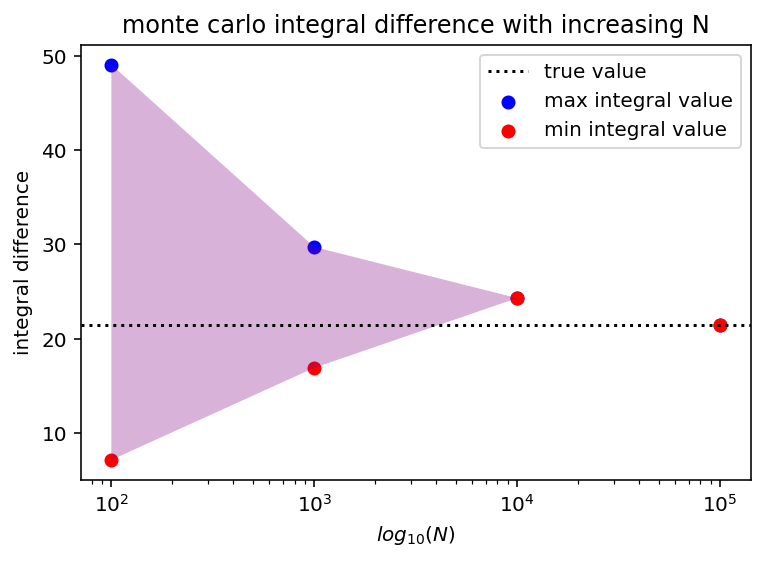

In [152]:
### PART 5

# BS - create an array of mins and maxes in ascending order of size N
maxes = np.array([np.max(mc_sums_2), np.max(mc_sums_3), np.max(mc_sums_4), np.max(mc_sum)])
mins = np.array([np.min(mc_sums_2), np.min(mc_sums_3), np.max(mc_sums_4), np.min(mc_sum)])

# BS - create an array of the N's
N_ary = np.array([N2, N3, N4, N])

# BS - plot the results
plt.scatter(N_ary, maxes, label="max integral value", color = 'blue')
plt.scatter(N_ary, mins, label="min integral value", color = 'red')
plt.axhline(mc_sum, linestyle=":", color="black", label="true value")
plt.xscale('log')
plt.xlabel(r'$log_{10}(N)$')
plt.ylabel('integral difference')
plt.title('monte carlo integral difference with increasing N')
plt.fill_between(N_ary, maxes, mins, alpha=0.3, facecolor='purple')
plt.legend()
plt.show()

SRT: This all looks mostly fine, Bill. You just missed out on getting the perfect plot by not doing a batch for 1e5, and also not plotting the min value for 1e4. -2

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

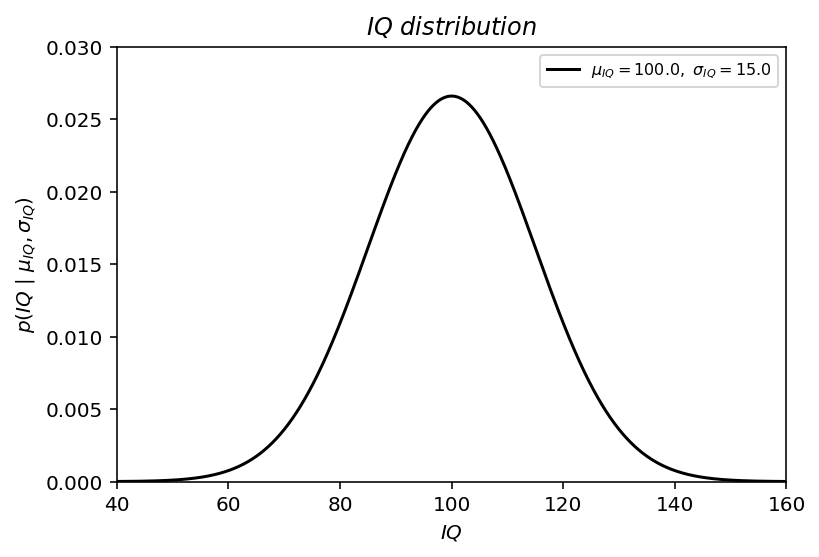

The 10 random draws are: 
 [107.60436379 102.55260696 116.41713604 106.6199866   93.98396289
 121.22809309  98.031814    95.29823783 129.00466834  88.35418961] 

The value of the pdf at IQ 145 is: 0.00030


In [153]:
### PART 1

# BS - set mu and sigma for IQ
mu_IQ = 100
sigma_IQ = 15


# BS - create the normal distribution from scipy
# and create a grid of values
distIQ = scipy.stats.norm(loc = mu_IQ, scale=sigma_IQ)
IQgrid = np.linspace(40, 160, 1000)

# BS - plot the distribution pdf
plt.plot(IQgrid, distIQ.pdf(IQ), ls='-', c='black', label=r'$\mu_{IQ} = %.1f, \ \sigma_{IQ} = %.1f $' % (mu_IQ, sigma_IQ))
plt.legend(loc = 1, fontsize=8)
plt.title(r'$IQ \ distribution$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.xlabel(r'$IQ$')
plt.ylabel(r'$p(IQ \ | \ \mu_{IQ},\sigma_{IQ})$')
plt.show()

# BS - take N=10 draws from the distribution
N = 10
draws = distIQ.rvs(N)
print("The 10 random draws are: \n", draws, "\n")

# BS - find the value of the pdf at 145
p_145 = distIQ.pdf(x=145)
print("The value of the pdf at IQ 145 is: %.5f" % p_145)

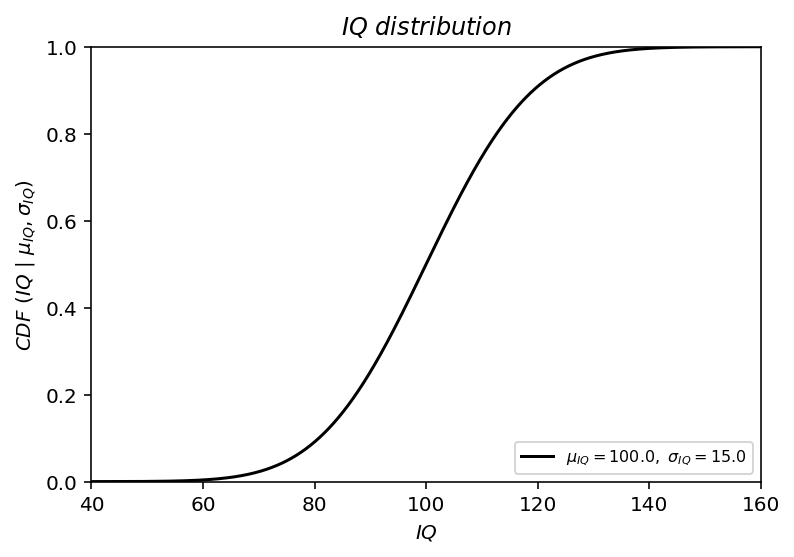

In [154]:
### PART 2

# BS - plot the distribution cdf
plt.plot(IQ, distIQ.cdf(IQ), ls='-', c='black', label=r'$\mu_{IQ} = %.1f, \ \sigma_{IQ} = %.1f $' % (mu_IQ, sigma_IQ));
plt.legend(loc = 4, fontsize=8)
plt.title(r'$IQ \ distribution$')
plt.xlim(40, 160)
plt.ylim(0, 1)
plt.xlabel(r'$IQ$')
plt.ylabel(r'$CDF \ (IQ \ | \ \mu_{IQ},\sigma_{IQ})$')
plt.show()


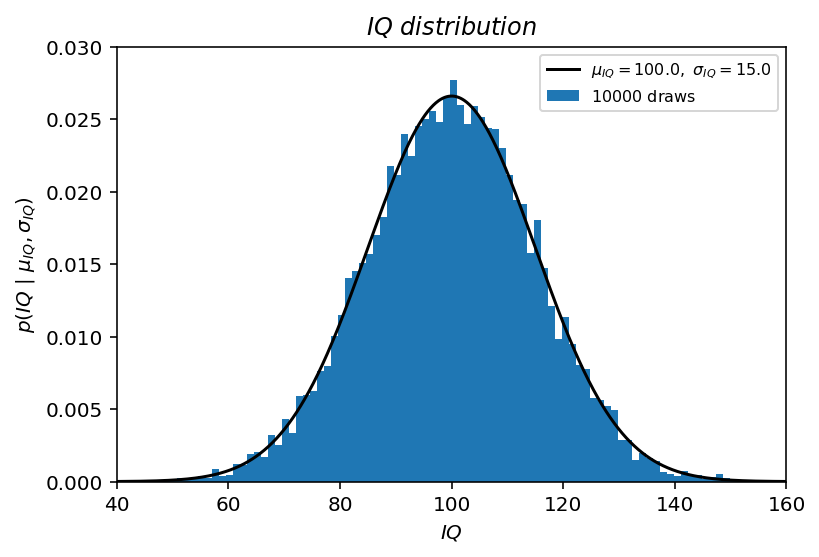

In [155]:

# BS - set the number of draws and access the ppf to draw x values
N = 10**4
x = distIQ.ppf(np.random.uniform(0,1,N))


# BS - plot a histogram of ppf values overlaid with the pdf. These should (and by my eye do) match
plt.hist(x, bins = 100, density=True, label=r'$%i$ draws' % N)
plt.plot(IQgrid, distIQ.pdf(IQ), ls='-', c='black', label=r'$\mu_{IQ} = %.1f, \ \sigma_{IQ} = %.1f $' % (mu_IQ, sigma_IQ))
plt.legend(loc = 1, fontsize=8)
plt.title(r'$IQ \ distribution$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.xlabel(r'$IQ$')
plt.ylabel(r'$p(IQ \ | \ \mu_{IQ},\sigma_{IQ})$')
plt.show()

### Part 3

The fraction of people who have an IQ above 145 is equivalent to one minus the fraction of people whose IQ's are below 145. The fraction of people who have IQ's below 145 can be found from the CDF. Taking one (one being the fraction of people who have IQs of any value) minus this gives us the fraction of people with an IQ above 145.

In [156]:
lower = distIQ.cdf(145)
upper = 1
p_above145 = upper - lower

print("the probability of having an IQ above 145 is %.5f, or %.3f percent " % (p_above145, p_above145*100))

the probability of having an IQ above 145 is 0.00135, or 0.135 percent 


#### Part 4

I am interpreting this "what IQ corresponds to 1:1,000,000" to be a probability equally distributed between each tail of the IQ distribution. This would mean that for a one in a million IQ, a random individual would have a one in two million chance of having an IQ below a certain threshold and a one in two million chance of having an IQ above a certain threshold, for a combined total of one in one million for either of those two possibilities. To find these, I can use the ppf to find the IQ value which corresponds to the percentiles that correspond to these probabilities. For a low IQ, a one in two million percentile would be the $0.0000005^{th}$ percentile, and for high IQ, a one in two million percentile would correspond to the $0.9999995^{th}$ percentile. Using the ppf, the IQ's at these percentiles can be found.

In [157]:
# BS - find the IQ at the top of the distribution using the ppf

upper_mil = distIQ.ppf(0.9999995)

# BS - find the IQ of the bottom of the distribution using the ppf
lower_mil = distIQ.ppf(0.0000005)

print("A 'one in a million IQ' is an IQ below %.3f or an IQ above %.3f" %(lower_mil, upper_mil))

A 'one in a million IQ' is an IQ below 26.625 or an IQ above 173.375


SRT: OK. I actually meant single tailed quantiles for 1 in a million, but this was a reasonable interpretation.

## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

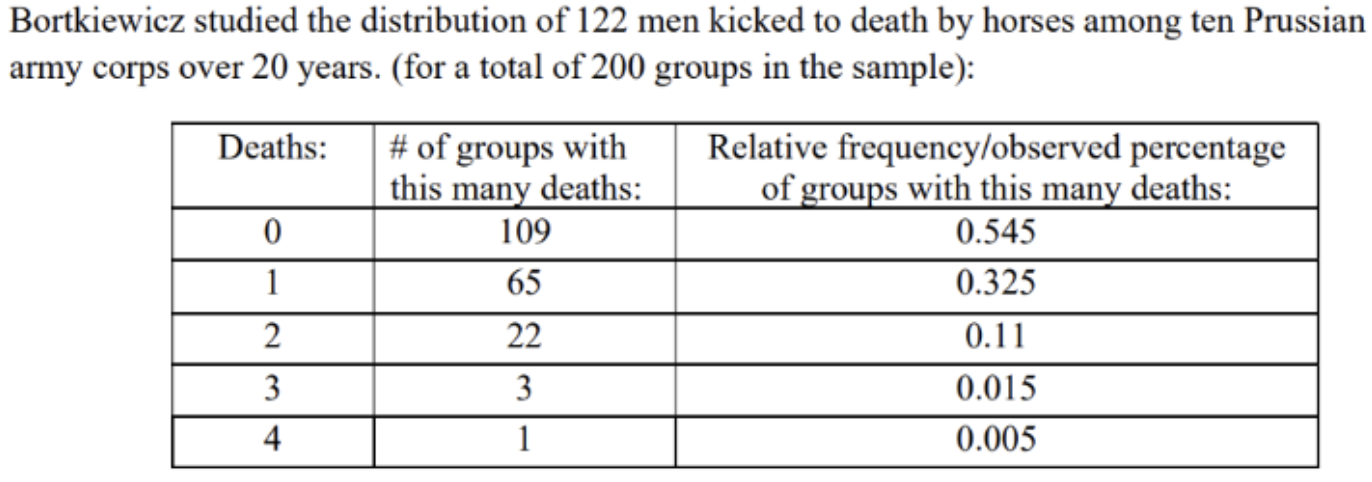

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

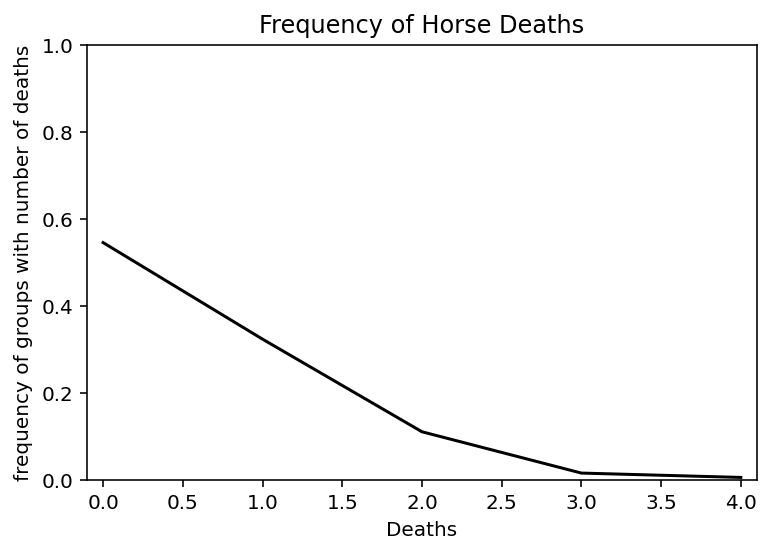

In [158]:
# PART 1

# BS - create the deaths and frequency of deaths array
deaths = np.array([0,1,2,3,4])
freq = ([0.545, 0.323, 0.11, 0.015, 0.005])

# BS - plot the things
plt.plot(deaths, freq, c='black')
plt.title('Frequency of Horse Deaths')
plt.xlim(-0.1,4.1)
plt.ylim(0,1)
plt.xlabel('Deaths')
plt.ylabel('frequency of groups with number of deaths')
plt.show()

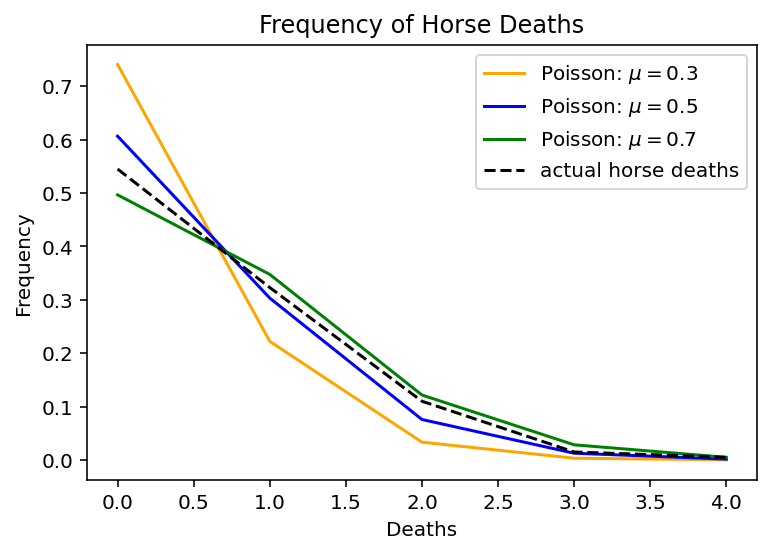

In [159]:
### PART 2

# BS - Mu for Poisson - mean number of counts over given time interval - reasonable first eyball guess, 0.3
# From there, my eyeball intituion is telling me to go up

mu1 = 0.3
mu2 = 0.5
mu3 = 0.7

# BS - create each poisson distribution with each mu value
dist_horsedeath1 = scipy.stats.poisson(mu1)
dist_horsedeath2 = scipy.stats.poisson(mu2)
dist_horsedeath3 = scipy.stats.poisson(mu3)

# BS - create an array of x values to sample the distribution
deathgrid = np.arange(0,5)

# BS - plot the distributions for each mu
plt.plot(deathgrid, dist_horsedeath1.pmf(deathgrid), c='orange', label=r'Poisson: $\mu = %.1f$' % mu1)
plt.plot(deathgrid, dist_horsedeath2.pmf(deathgrid), c='blue', label=r'Poisson: $\mu = %.1f$' % mu2)
plt.plot(deathgrid, dist_horsedeath3.pmf(deathgrid), c='green', label=r'Poisson: $\mu = %.1f$' % mu3)
plt.plot(deaths, freq, c='black', ls='--', label='actual horse deaths')
plt.title('Frequency of Horse Deaths')
plt.xlabel('Deaths')
plt.ylabel('Frequency')
plt.legend()
plt.show()


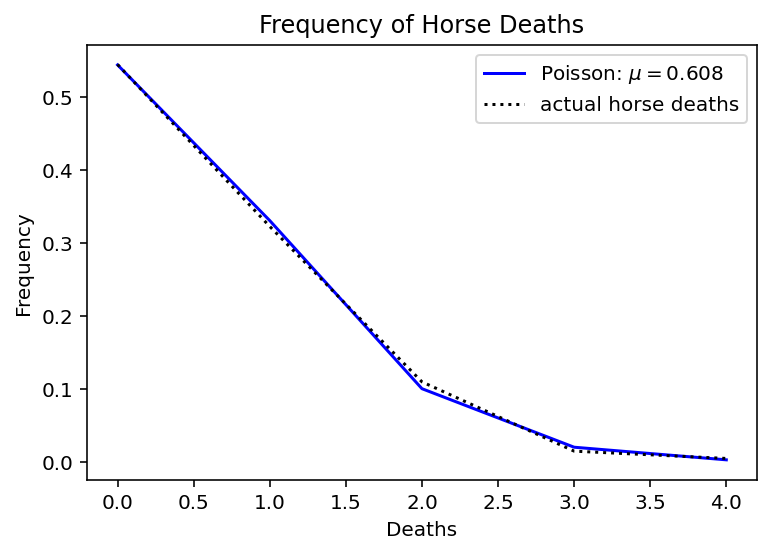

In [160]:
### Part 3

# BS - calculate mu as a weighted mean
mu_calc = np.sum(deaths*freq)

# BS - create the poisson distribution with this mu 
dist_horsedeath_calc = scipy.stats.poisson(mu_calc)

# BS - plot this distribution over the actual data
plt.plot(deathgrid, dist_horsedeath_calc.pmf(deathgrid), c = 'blue', label=r'Poisson: $\mu = %0.3f$' % mu_calc)
plt.plot(deaths, freq, c='black', ls=':', label='actual horse deaths')
plt.title('Frequency of Horse Deaths')
plt.xlabel('Deaths')
plt.ylabel('Frequency')
plt.legend()
plt.show()

SRT: Very good!